# 14 • Visualización con Altair
La visualización de datos es una herramienta importante en el análisis para la Ciencia de Datos. En el caso de Python, existen distinas librerías de visualización ye entre las más comunes se encuentran `Matplotlib` y `Seaborn`. Sin embargo, existe para esta clase les compartiré información de cómo utilizar `Alatir` que es una librería más nueva, interactiva y fácil de utilizar por su estructura.

## Contenido
1. Instalación
2. Estructura
3. Limitaciones
4. Gráficas básicas
5. Gráficas interactivas
7. Referencias

## 1. Instalación
Para instalar esta librería, se puede realizar desde Anaconda o con PIP (package installer for Python). Los siguientes comandos incluyen los datasets para ejemplos de nombre *vega_datasets*. Para más detalles sobre la instalación [dar click en este link](https://altair-viz.github.io/getting_started/installation.html)

In [2]:
# # Para instalar desde ANACONDA
# # (correrlo sólo si no se tiene instalada aún la librería)

# !conda install -c conda-forge altair vega_datasets

In [3]:
# # Para instalar desde PIP
# # (correrlo sólo si no se tiene instalada aún la librería)

# !pip install altair vega_datasets

In [6]:
# Load general libraries
import pandas as pd
import numpy as np

# Load viz library Altair
import altair as alt
alt.renderers.enable('mimetype') #<-Este nos sirve para ver las gráficas en GitHub
#alt.renderers.enable('default') #<-es el más común pero refleja las gráficas en GitHub

RendererRegistry.enable('mimetype')

## 2. Estructura
La ventaja de Altair es que tiene una estructura concisa y sencilla de entender, que permite crear distintas gráficas estadísticas:

![](img/14-01_structure.png)

Para más detalles sobre la estructura básica, [acceder a este link](https://altair-viz.github.io/getting_started/starting.html).

A continuación se muestran los **distintos tipos de gráficas** que son más comunes:

|Name|Mark|Description|
|---|---|---|
|area|mark_area()|A filled area plot.|
|bar|mark_bar()|A bar plot.|
|circle|mark_circle()|A scatter plot with filled circles.|
|line|mark_line()|A line plot.|
|point|mark_point()|A scatter plot with configurable point shapes.|
|rect|mark_rect()|A filled rectangle, used for heatmaps|
|text|mark_text()|A scatter plot with points represented by text.|

Cada una de estas marcas tiene distintas propiedades las cuales se pueden consulatr en [este link](https://altair-viz.github.io/user_guide/marks.html#mark-properties).

<br>

A continuación se muestran las **variables del `encode`** más utilizadas:

|Channel|Altair Class|Description|
|---|---|---|
|x|X|The x-axis value|
|y|Y|The y-axis value|
|angle|Angle|The angle of the mark|
|color|Color|The color of the mark|
|fill|Fill|The fill for the mark|
|opacity|Opacity|The opacity of the mark|
|shape|Shape|The shape of the mark|
|size|Size|The size of the mark|
|stroke|Stroke|The stroke of the mark|
|strokeDash|StrokeDash|The stroke dash style|
|text|Text|Text to use for the mark|
|tooltip|Tooltip|The tooltip value|
|order|Order|Sets the order of the marks|
|longitude|Longitude|Longitude for geo charts|
|latitude|Latitude|Latitude for geo charts|

<br>

Finalmente, algo importante que habrá que tomar en cuenta son los siguientes **tipos de encodings** para las variables utilizadas. Para mayor detalle [ver aquí](https://altair-viz.github.io/user_guide/encoding.html#encoding-data-types).

|Data Type|Shorthand Code|Description|
|---|:---:|---|
|quantitative|**Q**|a continuous real-valued quantity|
|ordinal|**O**|a discrete ordered quantity|
|nominal|**N**|a discrete unordered category|
|temporal|**T**|a time or date value|
|geojson|**G**|a geographic shape|


## 3. Limitaciones
- La base de datos debe estar en formato Pandas DataFrame

- Sin problema se puede utilizar una base de datos de 5 mil registros. Sin embargo, si la base de datos es más grande se pueden hacer alguna de las siguientes opciones:
    - Desabilitar el máximo de 5 mil registros con `alt.data_transformers.disable_max_rows()`, sin embaro esto generará que el archivo sea muy pesado.
    - Manipular la base de datos haciendo *Data Wrangling*, por ejemplo usando [pivot_table](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html), para utilizar la información resumida para la gráfica.
- Las gráfica se pueden guardar de forma natural en formato `json` y `html`, pero para guardarla en otros formatos como `png`, `svg` o `pdf` se deben seguir algunos pasos adicionales, [ver aquí](https://altair-viz.github.io/user_guide/saving_charts.html#png-svg-and-pdf-format).

## 4. Gráficas básicas
Para esta sección utilizaré información del proyecto de EDA de [@EduardoSanchezZ](https://github.com/EduardoSanchezZ/Proyecto-Sports-Analytics), específicamente sobre partidos del Cruz Azul. Esta base de datos contiene 255 registros, por lo que no será necesario hacer data wrangling para utilizar Altair.

In [12]:
df_cruzazul = pd.read_csv("https://raw.githubusercontent.com/EduardoSanchezZ/Proyecto-Sports-Analytics/main/Data/Cruz%20Azul/Juegos_de_Cruz_Azul.csv")
df_cruzazul.head(4)

,ID_Partido,Ciclo,Torneo,ID_Torneo,Fecha,Fase,Condicion,DT,Rival,Pts_pronosticados,Goles_anotados,Goles_recibidos,Disparos_realizados,Disparos_permitidos,xGF,xGC,xJG,xJE,xJP
0,1,2016-17,C-17,1,2017-01-07,REG,Local,Francisco Jemez,Necaxa,1.55,1,0,10,5,0.51,0.24,0.34,0.53,0.14
1,2,2016-17,C-17,1,2017-01-15,REG,Visita,Francisco Jemez,Pumas Unam,1.15,0,1,9,6,1.17,0.36,0.58,0.31,0.11
2,3,2016-17,C-17,1,2017-01-21,REG,Local,Francisco Jemez,Monterrey,1.47,2,2,19,7,2.14,1.32,0.56,0.22,0.22
3,4,2016-17,C-17,1,2017-01-27,REG,Visita,Francisco Jemez,Tijuana,1.05,0,1,14,6,0.71,0.29,0.42,0.44,0.14


In [13]:
df_cruzazul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID_Partido           225 non-null    int64  
 1   Ciclo                225 non-null    object 
 2   Torneo               225 non-null    object 
 3   ID_Torneo            225 non-null    int64  
 4   Fecha                225 non-null    object 
 5   Fase                 225 non-null    object 
 6   Condicion            225 non-null    object 
 7   DT                   225 non-null    object 
 8   Rival                225 non-null    object 
 9   Pts_pronosticados    225 non-null    float64
 10  Goles_anotados       225 non-null    int64  
 11  Goles_recibidos      225 non-null    int64  
 12  Disparos_realizados  225 non-null    int64  
 13  Disparos_permitidos  225 non-null    int64  
 14  xGF                  225 non-null    float64
 15  xGC                  225 non-null    flo

### Gráfica de barras
Goles anotados por Cruz Azul contra equipo rival.
- [Simple Bar Chart](https://altair-viz.github.io/gallery/simple_bar_chart.html)

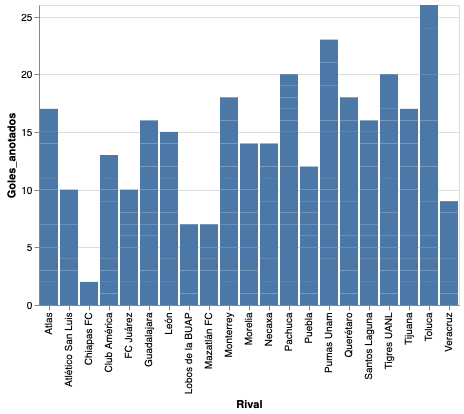

In [95]:
# La gráfica más básica
alt.Chart(df_cruzazul).mark_bar().encode(
    x="Rival",
    y="Goles_anotados"
)

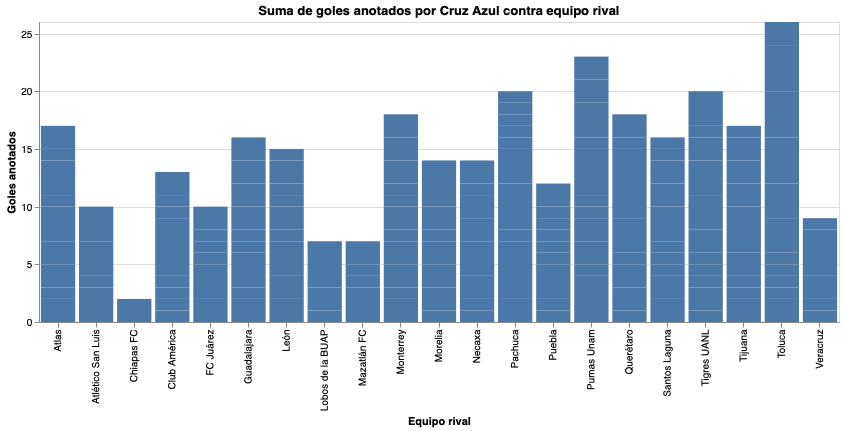

In [96]:
# Grafica tuneada: se cambian nombres de ejes, añade título y cambia tamaño del gráfico
alt.Chart(df_cruzazul).mark_bar().encode(
    alt.X("Rival:N", title="Equipo rival"),
    alt.Y("Goles_anotados:Q", title="Goles anotados")
).properties(
    width=800,height=300,
    title="Suma de goles anotados por Cruz Azul contra equipo rival"
)

### Histograma
Frecuencia de puntos pronosticados para el Cruz Azul.
- [Simple Histogram](https://altair-viz.github.io/gallery/simple_histogram.html)

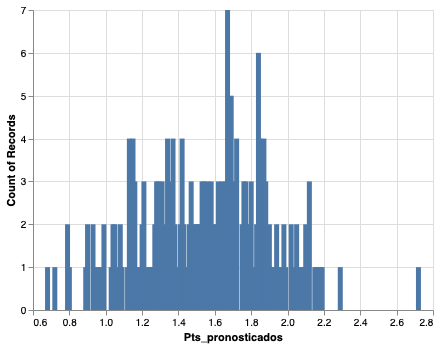

In [57]:
# La gráfica más básica
alt.Chart(df_cruzazul).mark_bar().encode(
    alt.X("Pts_pronosticados"),
    y='count()'
)

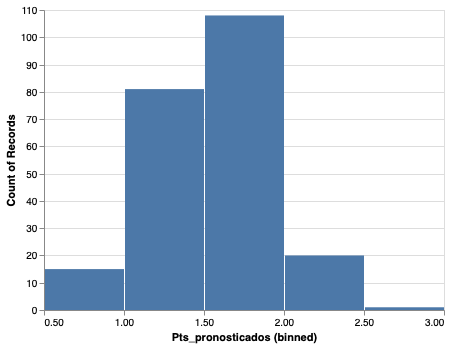

In [58]:
# La gráfica básica usando bin
alt.Chart(df_cruzazul).mark_bar().encode(
    alt.X("Pts_pronosticados", bin=True),
    y='count()'
)

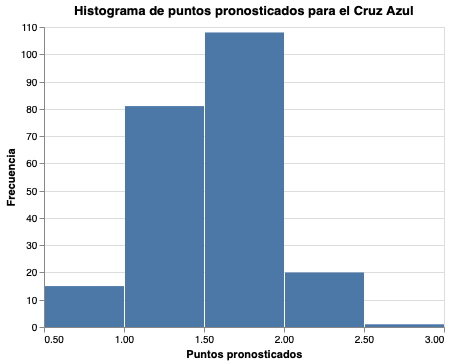

In [98]:
# Grafica misma gráfica pero tuneada: se cambian nombres de ejes y añade título
alt.Chart(df_cruzazul).mark_bar().encode(
    alt.X("Pts_pronosticados:Q", title="Puntos pronosticados", bin=True),
    alt.Y('count()', title="Frecuencia")
).properties(
    title="Histograma de puntos pronosticados para el Cruz Azul"
)

### Gráfica de línea
Gráfica de línea con la frecuencia de disparos realizados.
- [Simple Line Chart](https://altair-viz.github.io/gallery/simple_line_chart.html)

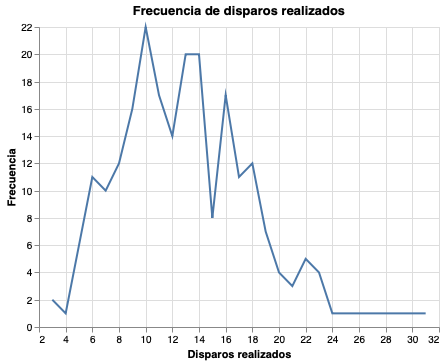

In [99]:
# La gráfica más básica
alt.Chart(df_cruzazul).mark_line().encode(
    alt.X("Disparos_realizados:Q",title="Disparos realizados"),
    alt.Y('count()', title="Frecuencia")
).properties(
    title="Frecuencia de disparos realizados"
)

### Gráfico de área acumulada
Gráfica de área acumulada en función de la condición de local o visitante del equipo Cruz Azul.

- [Simple Stacked Area Chart](https://altair-viz.github.io/gallery/simple_stacked_area_chart.html)

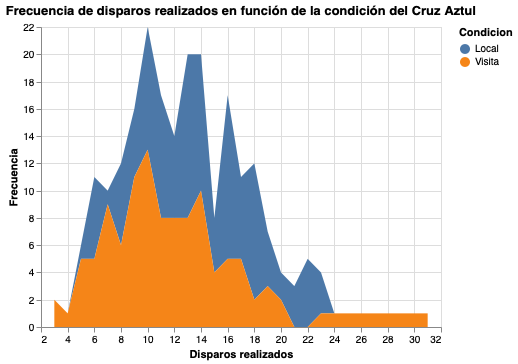

In [100]:
alt.Chart(df_cruzazul).mark_area().encode(
    alt.X("Disparos_realizados:Q",title="Disparos realizados"),
    alt.Y('count()', title="Frecuencia"),
    color="Condicion:N"
).properties(
    title="Frecuencia de disparos realizados en función de la condición del Cruz Aztul"
)

### Diagrama de dispersión
Basado en la probabilidad de que un disparo sea anotación, se comparan las siguientes variables usando diagrama de dispersión:

- xGF: Probabilidad acumulada de que los disparos de Cruz Azul terminen en gol 
- xGC: Probabilidad acumulada de que los disparos rivales terminen en gol

Página con ejemplo original de altair:
- [Simple Scatter Plot with Tooltips](https://altair-viz.github.io/gallery/scatter_tooltips.html)

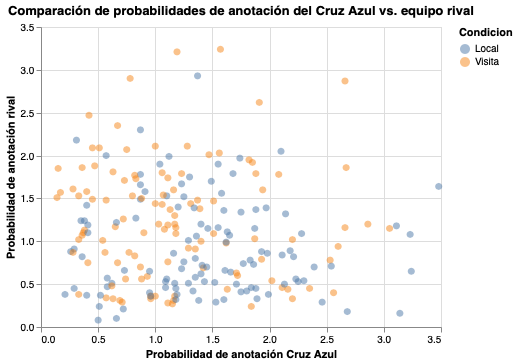

In [105]:
alt.Chart(df_cruzazul).mark_circle(size=50,opacity=.50).encode(
    alt.X("xGF:Q",title="Probabilidad de anotación Cruz Azul"),
    alt.Y('xGC:Q', title="Probabilidad de anotación rival"),
    color="Condicion:N",
    tooltip=['xGF','xGC']
).properties(
    title="Comparación de probabilidades de anotación del Cruz Azul vs. equipo rival"
)

### Heatmap
Mapa de calor *heatmap* de puntos pronosticados en función de los goles anotados y los goles recibidos.

- [Simple Heatmap](https://altair-viz.github.io/gallery/simple_heatmap.html)

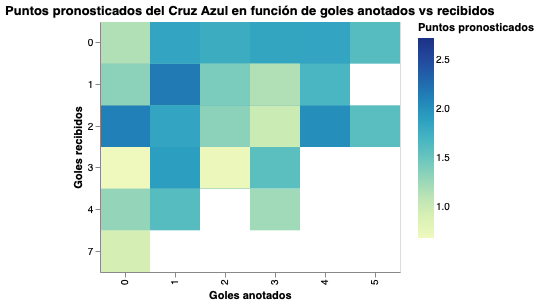

In [106]:
alt.Chart(df_cruzazul).mark_rect().encode(
    alt.X('Goles_anotados:N',title="Goles anotados"),
    alt.Y('Goles_recibidos:N',title="Goles recibidos"),
    alt.Color('Pts_pronosticados:Q',title="Puntos pronosticados")
).properties(
    width=300, height=250,
    title="Puntos pronosticados del Cruz Azul en función de goles anotados vs recibidos"
)

In [7]:
pd.read_csv("https://raw.githubusercontent.com/Carol-Castaneda/EDA_Airbnb_Buenos-Aires/main/data/airbnb_buenos_aires.csv")

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,11508,Amazing Luxurious Apt-Palermo Soho,42762,Candela,NaN,Palermo,-34.58184,-58.42415,Entire home/apt,9823,3,30,2022-07-17,0.24,1,314,3,NaN
1,14222,"RELAX IN HAPPY HOUSE - PALERMO, BUENOS AIRES",87710233,María,NaN,Palermo,-34.58617,-58.41036,Entire home/apt,3728,7,98,2022-08-14,0.79,3,324,8,NaN
2,118877,Entire Studio/apt in Buenos Aires,600320,Roxana,NaN,Palermo,-34.57734,-58.43790,Entire home/apt,5687,2,24,2022-06-21,0.18,2,174,5,NaN
3,14711,SPECTACULAR ANCIENT HOUSE,57770,Cintia,NaN,San Nicolas,-34.60786,-58.37211,Entire home/apt,17370,1,0,NaN,NaN,1,365,0,NaN
4,120874,Great apt 1 Bedroom - 1.5 Bath /Recoleta,530261,Luciano,NaN,Recoleta,-34.58991,-58.39931,Entire home/apt,6514,14,10,2022-04-27,0.07,27,295,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17942,32279620,Lumiere Place Puerto Madero,408551,Guille,NaN,Dique 2,-34.61684,-58.36386,Entire home/apt,9988,3,70,2022-08-14,1.61,13,154,25,NaN
17943,27460266,••WELCOME! New Modern Suite Puerto Madero |CasaBA,183209971,Giselle,NaN,Dique 2,-34.61596,-58.36367,Entire home/apt,20265,3,11,2020-11-01,0.28,15,78,0,NaN
17944,46217105,☆PUERTO MADERO LUXURIOUS APARTMENT ☆ CasaBAires,183209971,Giselle,NaN,Dique 2,-34.61459,-58.36378,Entire home/apt,26055,3,5,2022-06-06,0.37,15,81,4,NaN
17945,31262931,Puerto Madero Elegant Suite | CasaBAires,183209971,Giselle,NaN,Dique 3,-34.60776,-58.36477,Entire home/apt,20265,3,19,2022-07-11,0.44,15,83,5,NaN


## 7. Referencias
- [Altair Python library](https://altair-viz.github.io)